# Method of Moments (continued)

## Binomial distribution

Let's take another look at the binomial distribution method of moments example.

Recall that for a $B(n,p)$ distribution, we found the following point estimators for the parameters $n$ and $p$, respectively:

$$\hat n = \frac{m_1^2}{m_1 + m_1^2 - m_2}$$
$$\hat p = 1 + m_1 - \frac{m_2}{m_1}$$

Here, $m_1=\overline X$ (the sample mean) and $m_2 = \frac{1}{n}\sum_{i=1}^nX_i^2$ (the sample second moment).


In [4]:
x <- rbinom(1000, 10, 0.7)
m1 <- mean(x)
m2 <- mean(x^2)
nHat <- m1^2/(m1 + m1^2 - m2)
pHat <- 1 + m1 - (m2/m1)
nHat
pHat

[1] 10.35318

[1] 0.6788253

Let's check our work graphically.

First, let's compare a histogram of the data (using the *proportions* of the data on the $y$-axis instead of the frequencies by using the **probability=TRUE** option) with a plot of the probability mass function of our estimated binomial distribution.

We first create a vector **xx** containing $x$-values.  In this case, **2:10** is the same thing as **c(2,3,4,5,6,7,8,9,10)**.  We could have also used **seq(2, 10, 1)**.  The third argument is the *step size*.  This is useful if we want finer control of our $x$-values.

Next, we create a vector **yy** containing $y$-values.  We obtain them by plugging **x** into the **dbinom** function, which computes values of the probability **d**ensity (a.k.a mass) function of a **binom**ial distribution.

Finally, **lines** lets us draw plots on top of existing plots.

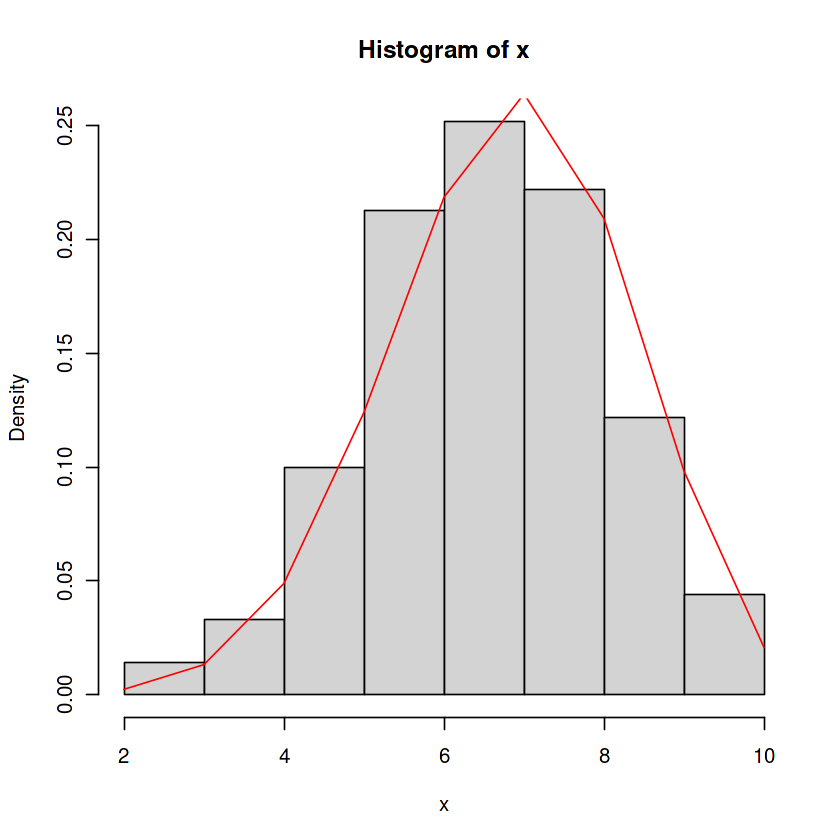

In [11]:
hist(x, probability=TRUE)
xx <- 2:10
yy <- dbinom(xx, 10, pHat)
lines(xx, yy, col="red")

Now let's do the same thing, but compare the graph of the empirical cumulative distribution function with that of the cumulative distribution function of the estimated probability distribution.  Now we use **pbinom**, which returns values of the cdf instead of the pmf.

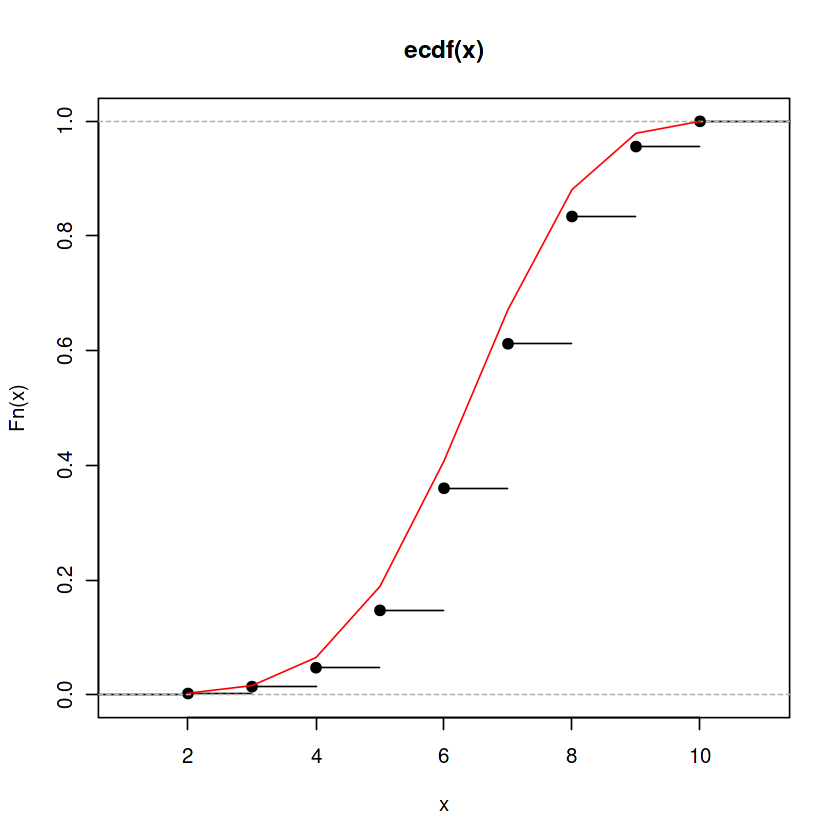

In [13]:
plot.ecdf(x)
xx <- 2:10
yy <- pbinom(xx, 10, pHat)
lines(xx, yy, col="red")

## Normal distribution

Recall from class that we found the following point estimates for $\mu$ and $\sigma^2$ for an $N(\mu,\sigma^2)$ distribution.

$$\hat\mu = m_1$$
$$\widehat{\sigma^2} = m_2 - m_1^2$$

In [2]:
x <- rnorm(1000, 50, 20)
m1 <- mean(x)
m2 <- mean(x^2)
muHat <- m1
sigmaSquaredHat <- m2 - m1^2
muHat
sigmaSquaredHat

[1] 48.92308

[1] 388.7257

Let's play the same game as above and compare a histogram with a plot of the pdf of the estimated distribution.

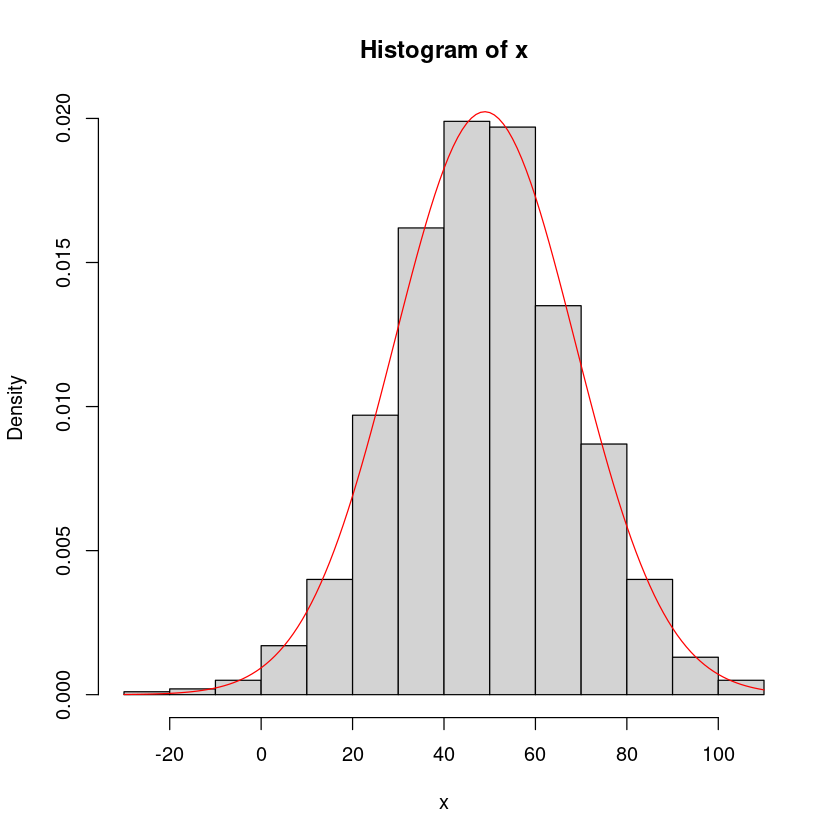

In [5]:
hist(x, probability=TRUE)
xx <- -30:110
yy <- dnorm(xx, muHat, sqrt(sigmaSquaredHat))
lines(xx, yy, col="red")

And now let's compare plots of the empirical cumulative distribution function with the cumulative distribution function of the estimated distribution.

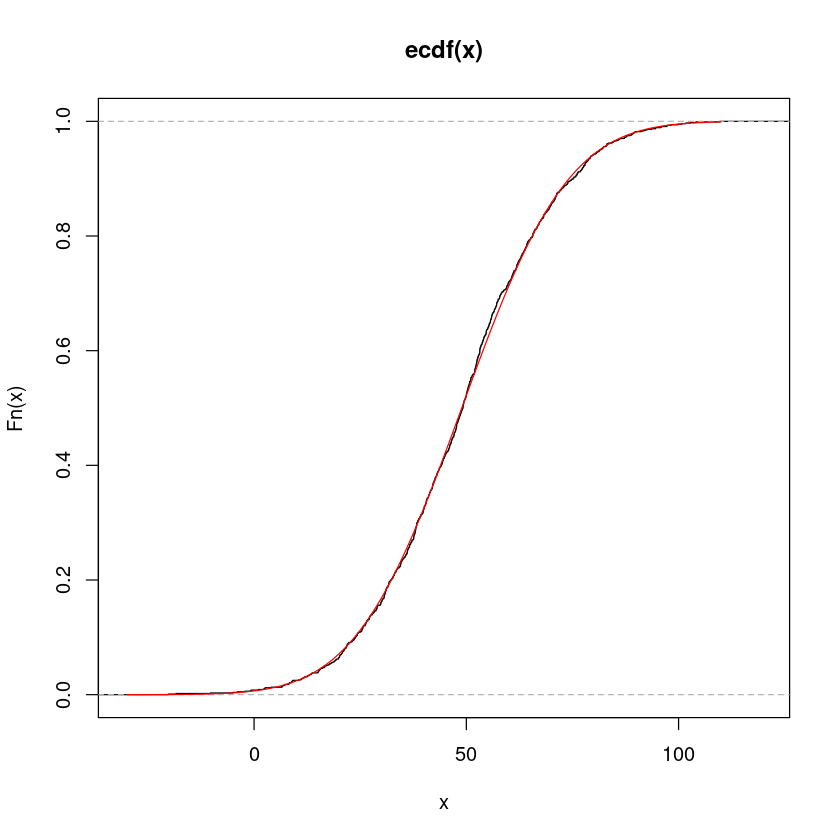

In [7]:
plot.ecdf(x)
yy <- pnorm(xx, muHat, sqrt(sigmaSquaredHat))
lines(xx, yy, col="red")

## Uniform distribution

Finally, we saw that a $U(a, b)$ distribution has method of moments estimators

$$\hat a = m_1 - \sqrt{3m_2 - 3m_1^2}$$
$$\hat b = m_1 + \sqrt{3m_2 - 3m_1^2}$$

Let's check our work!

In [8]:
x <- runif(1000, 3, 7)
m1 <- mean(x)
m2 <- mean(x^2)
aHat <- m1 - sqrt(3*m2 - 3*m1^2)
bHat <- m1 + sqrt(3*m2 - 3*m1^2)
aHat
bHat

[1] 2.99766

[1] 7.021626

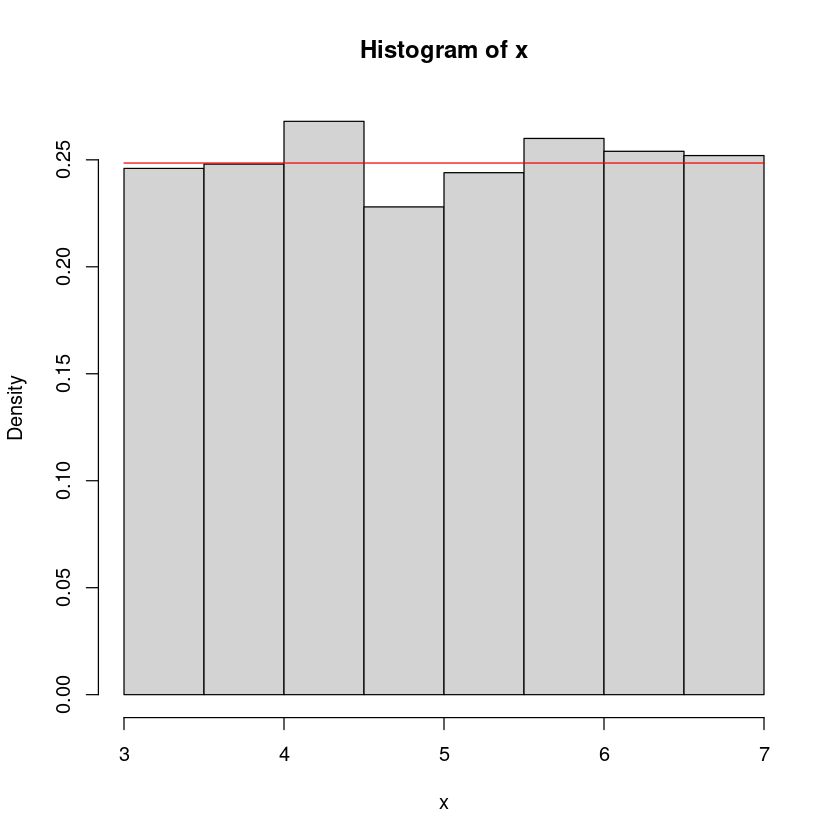

In [11]:
hist(x, probability = TRUE)
xx <- seq(3, 7, 0.5)
yy <- dunif(xx, aHat, bHat)
lines(xx, yy, col="red")

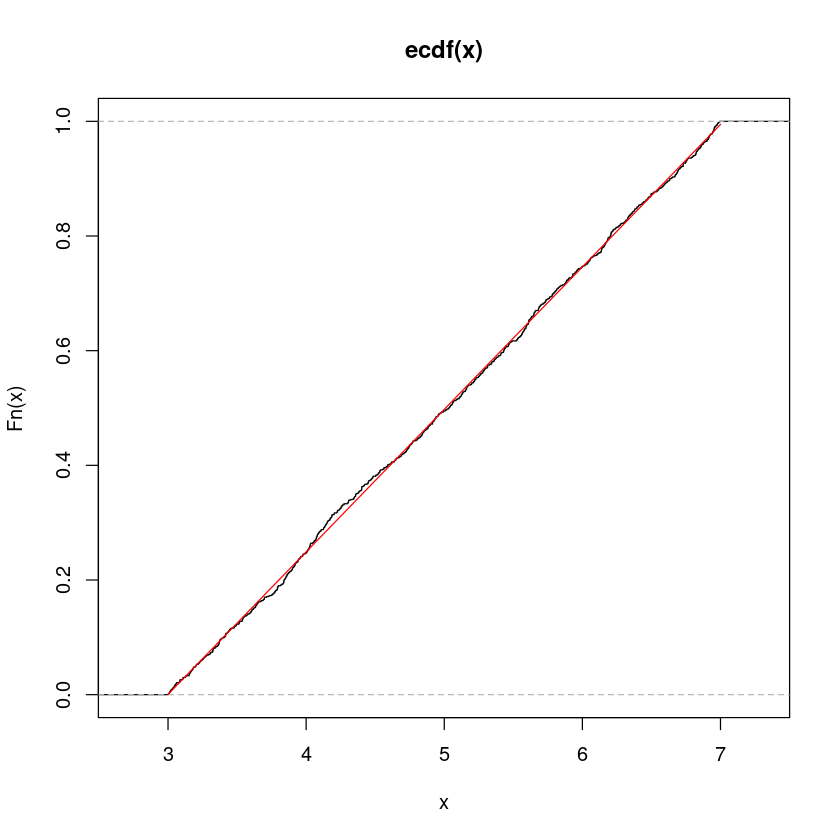

In [13]:
plot.ecdf(x)
yy <- punif(xx, aHat, bHat)
lines(xx, yy, col="red")